In [1]:
#Set charts to view inline;(directive '%')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot') 


from sklearn import preprocessing as prep
from datetime import datetime


#### Index by CaseNumber  && Cleaning 'DeathLoc' coordinates 

In [2]:
ADRD = 'Accidental_Drug_Related_Deaths__2012-2017.csv'
ORTA ='Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv'
AHBT = 'Affordable_Housing_by_Town_2011-Present.csv'
data = pd.read_csv(AHBT)

df = pd.read_csv(ADRD, index_col='CaseNumber',parse_dates=['Date'])
df3 = pd.read_csv(ORTA,parse_dates=['FiscalYear'])




#CLEAN df
df['DeathLoc'] = [i.split("\n") for i in df['DeathLoc']]
df['DeathLoc'] =[i[1].strip('()').split(',') for i in df['DeathLoc']]

#CLEAN df3
df3.TownGeo = [i.split("\n") for i in df3.TownGeo]
df3.TownGeo =[i[1].strip('()').split(',') for i in df3.TownGeo]
df3.Town= df3.Town.str.upper()
df3.Admissions = df3.Admissions.fillna(0)
df3['Unduplicated Clients'] = df3['Unduplicated Clients'].fillna(0)

df.head()

Date     Sex   Race   Age Residence City Residence State  \
CaseNumber                                                                  
13-16336   2013-11-09  Female  White  53.0         GROTON             NaN   
12-18447   2012-12-29    Male  White  30.0        WOLCOTT             NaN   
14-2758    2014-02-18    Male  White  43.0        ENFIELD             NaN   
14-13497   2014-09-07  Female  White  24.0    WALLINGFORD             NaN   
13-14421   2013-10-04  Female  White  26.0     WEST HAVEN             NaN   

           Residence County   Death City Death State Death County  \
CaseNumber                                                          
13-16336         NEW LONDON       GROTON         NaN   NEW LONDON   
12-18447          NEW HAVEN    WATERBURY         NaN    NEW HAVEN   
14-2758                 NaN      ENFIELD         NaN          NaN   
14-13497                NaN  WALLINGFORD         NaN    NEW HAVEN   
13-14421          NEW HAVEN   WEST HAVEN         NaN    NEW HAVEN   

                      ...            Benzodiazepine Methadone Amphet Tramad  \
CaseNumber            ...                                                     
13-16336              ...                         Y       NaN    NaN    NaN   
12-18447              ...                       NaN       NaN    NaN    NaN   
14-2758               ...                         Y       NaN    NaN    NaN   
14-13497              ...                       NaN       NaN    NaN    NaN   
13-14421              ...                       NaN       NaN    NaN    NaN   

           Morphine (not heroin) Other Any Opioid MannerofDeath  \
CaseNumber                                                        
13-16336                     NaN   NaN        NaN      Accident   
12-18447                     NaN   NaN        NaN      Accident   
14-2758                      NaN   NaN        NaN      Accident   
14-13497                     NaN   NaN        NaN      Accident   
13-14421                     NaN   NaN        NaN      Accident   

           AmendedMannerofDeath                  DeathLoc  
CaseNumber                                                 
13-16336                    NaN   [41.343693,  -72.07877]  
12-18447                    NaN  [41.554261,  -73.043069]  
14-2758                     NaN  [41.976501,  -72.591985]  
14-13497                    NaN  [41.454408,  -72.818414]  
13-14421                    NaN  [41.272336,  -72.949817]  

[5 rows x 31 columns]

In [3]:
#avg admission over 2012 to 2016 avg town

In [4]:
df3

FiscalYear              Town  Admissions  Unduplicated Clients  \
0   2012-01-01           ANDOVER         0.0                   0.0   
1   2014-01-01        WOODBRIDGE        17.0                  16.0   
2   2014-01-01            BOZRAH        13.0                  11.0   
3   2014-01-01         HARWINTON        28.0                  13.0   
4   2015-01-01            OXFORD        62.0                  36.0   
5   2014-01-01            SHARON        39.0                  25.0   
6   2012-01-01          COVENTRY        43.0                  21.0   
7   2015-01-01     NEW FAIRFIELD        58.0                  37.0   
8   2015-01-01          HARTLAND         0.0                   0.0   
9   2014-01-01          HARTFORD      2328.0                1286.0   
10  2015-01-01        WEST HAVEN       410.0                 282.0   
11  2016-01-01        BURLINGTON        53.0                  30.0   
12  2014-01-01        EAST HAVEN       394.0                 269.0   
13  2014-01-01  NORTH STONINGTON        15.0                  11.0   
14  2014-01-01          WESTPORT        35.0                  27.0   
15  2015-01-01          COLUMBIA        28.0                  20.0   
16  2013-01-01            CANAAN        28.0                  17.0   
17  2014-01-01           BETHANY        23.0                  14.0   
18  2014-01-01           SHELTON       231.0                 157.0   
19  2014-01-01            VERNON       142.0                  90.0   
20  2015-01-01           LEBANON        85.0                  57.0   
21  2012-01-01           SPRAGUE        35.0                  23.0   
22  2013-01-01        FARMINGTON        40.0                  22.0   
23  2012-01-01       EAST HADDAM        25.0                  19.0   
24  2016-01-01        BLOOMFIELD        43.0                  27.0   
25  2015-01-01        WOODBRIDGE        17.0                  12.0   
26  2014-01-01            HAMDEN       259.0                 178.0   
27  2014-01-01           CHAPLIN        21.0                  19.0   
28  2014-01-01          THOMPSON        54.0                  37.0   
29  2015-01-01        COLCHESTER       131.0                  66.0   
..         ...               ...         ...                   ...   
820 2013-01-01            WILTON        18.0                  12.0   
821 2015-01-01        BRIDGEPORT      1797.0                1104.0   
822 2013-01-01             SALEM        27.0                  13.0   
823 2016-01-01           POMFRET        18.0                  12.0   
824 2016-01-01           ASHFORD        29.0                  15.0   
825 2015-01-01           CLINTON        68.0                  50.0   
826 2016-01-01           NORWICH       500.0                 320.0   
827 2012-01-01    NORTH BRANFORD        68.0                  49.0   
828 2013-01-01           ANSONIA       153.0                  95.0   
829 2014-01-01            LISBON         0.0                   0.0   
830 2014-01-01        MIDDLETOWN       389.0                 249.0   
831 2015-01-01             DERBY       101.0                  70.0   
832 2014-01-01          SIMSBURY        36.0                  27.0   
833 2016-01-01         WATERBURY      1834.0                1087.0   
834 2013-01-01          STAMFORD       348.0                 212.0   
835 2012-01-01              KENT        11.0                  11.0   
836 2013-01-01        NEW LONDON       480.0                 262.0   
837 2016-01-01            MORRIS        15.0                   9.0   
838 2015-01-01           POMFRET        26.0                  15.0   
839 2012-01-01       NEW MILFORD       136.0                  84.0   
840 2015-01-01          HARTFORD      2545.0                1394.0   
841 2014-01-01         SOUTHBURY        68.0                  41.0   
842 2015-01-01            MORRIS        14.0                  10.0   
843 2013-01-01          CROMWELL        49.0                  28.0   
844 2012-01-01         WOODSTOCK        19.0                  13.0   
845 2013-01-01

In [5]:
df3 = df3.groupby('Town').agg({'Admissions':'sum'})

In [6]:
df3.isnull().sum()

Admissions    0
dtype: int64

<br><br>
#### Cleaning and mapping data

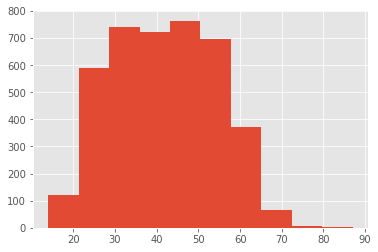

In [7]:
df['Age'].hist()
#skewed right:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [8]:
drugList = [
'Heroin',
'Cocaine',              
'Fentanyl',               
'Oxycodone',                 
'Oxymorphone',               
'EtOH',                     
'Hydrocodone',              
'Benzodiazepine',           
'Methadone',                 
'Amphet',                    
'Tramad'
]


df['Gender_Dummy'] = df.Sex.map({'Male': 0, 'Female': 1})

# an issue arrised with fillna(0) producing a value that was seen to the mapper as NaN.
# solution: fillna('N') and assign back to column. mapping works properly.
for drug in drugList:
    print(drug)
    df[drug] = df[drug].fillna('N')
    df[drug + "_Mapped"] = pd.Series(df[drug]).map({'Y': 1, 'y': 1, 'N': 0, np.nan: 0})



Heroin
Cocaine
Fentanyl
Oxycodone
Oxymorphone
EtOH
Hydrocodone
Benzodiazepine
Methadone
Amphet
Tramad


In [9]:
df.keys()

Index(['Date', 'Sex', 'Race', 'Age', 'Residence City', 'Residence State',
       'Residence County', 'Death City', 'Death State', 'Death County',
       'Location', 'DescriptionofInjury', 'InjuryPlace', 'ImmediateCauseA',
       'Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Oxymorphone', 'EtOH',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine (not heroin)', 'Other', 'Any Opioid', 'MannerofDeath',
       'AmendedMannerofDeath', 'DeathLoc', 'Gender_Dummy', 'Heroin_Mapped',
       'Cocaine_Mapped', 'Fentanyl_Mapped', 'Oxycodone_Mapped',
       'Oxymorphone_Mapped', 'EtOH_Mapped', 'Hydrocodone_Mapped',
       'Benzodiazepine_Mapped', 'Methadone_Mapped', 'Amphet_Mapped',
       'Tramad_Mapped'],
      dtype='object')

In [10]:
df.groupby('Fentanyl_Mapped').agg({'Fentanyl_Mapped':'count'})

Fentanyl_Mapped
Fentanyl_Mapped                 
0.0                         2617
1.0                         1460

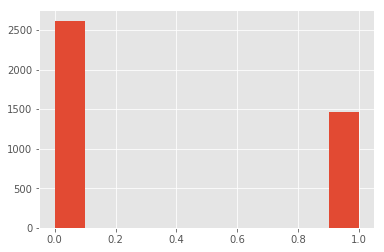

In [11]:
df.Fentanyl_Mapped.hist()


### Building a Matrices for Race AND Cleaning up column headers (", ")

In [12]:
# df.groupby('Race').agg('count')

In [13]:
race_dummies = pd.get_dummies(df.Race, prefix='race')
## list comprehension to replace column headers with space and comma
race_dummies.columns = [col.replace(', ', '_') for col in race_dummies.columns]
race_dummies.head()

race_Asian Indian  race_Asian_Other  race_Black  race_Chinese  \
CaseNumber                                                                  
13-16336                    0                 0           0             0   
12-18447                    0                 0           0             0   
14-2758                     0                 0           0             0   
14-13497                    0                 0           0             0   
13-14421                    0                 0           0             0   

            race_Hawaiian  race_Hispanic_Black  race_Hispanic_White  \
CaseNumber                                                            
13-16336                0                    0                    0   
12-18447                0                    0                    0   
14-2758                 0                    0                    0   
14-13497                0                    0                    0   
13-14421                0                    0                    0   

            race_Native American_Other  race_Other  race_Unknown  race_White  
CaseNumber                                                                    
13-16336                             0           0             0           1  
12-18447                             0           0             0           1  
14-2758                              0           0             0           1  
14-13497                             0           0             0           1  
13-14421                             0           0             0           1

In [14]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, race_dummies], axis=1)
df.head()

Date     Sex   Race   Age Residence City Residence State  \
CaseNumber                                                                  
13-16336   2013-11-09  Female  White  53.0         GROTON             NaN   
12-18447   2012-12-29    Male  White  30.0        WOLCOTT             NaN   
14-2758    2014-02-18    Male  White  43.0        ENFIELD             NaN   
14-13497   2014-09-07  Female  White  24.0    WALLINGFORD             NaN   
13-14421   2013-10-04  Female  White  26.0     WEST HAVEN             NaN   

           Residence County   Death City Death State Death County    ...      \
CaseNumber                                                           ...       
13-16336         NEW LONDON       GROTON         NaN   NEW LONDON    ...       
12-18447          NEW HAVEN    WATERBURY         NaN    NEW HAVEN    ...       
14-2758                 NaN      ENFIELD         NaN          NaN    ...       
14-13497                NaN  WALLINGFORD         NaN    NEW HAVEN    ...       
13-14421          NEW HAVEN   WEST HAVEN         NaN    NEW HAVEN    ...       

           race_Asian_Other race_Black race_Chinese race_Hawaiian  \
CaseNumber                                                          
13-16336                  0          0            0             0   
12-18447                  0          0            0             0   
14-2758                   0          0            0             0   
14-13497                  0          0            0             0   
13-14421                  0          0            0             0   

           race_Hispanic_Black race_Hispanic_White race_Native American_Other  \
CaseNumber                                                                      
13-16336                     0                   0                          0   
12-18447                     0                   0                          0   
14-2758                      0                   0                          0   
14-13497                     0                   0                          0   
13-14421                     0                   0                          0   

           race_Other race_Unknown race_White  
CaseNumber                                     
13-16336            0            0          1  
12-18447            0            0          1  
14-2758             0            0          1  
14-13497            0            0          1  
13-14421            0            0          1  

[5 rows x 54 columns]

## Total count based on City [County?]

In [15]:
# drug_mapped = df.keys()[33:43]

In [16]:
df['Death City'].shape

(4081,)

In [17]:
df['Death City']= df['Death City'].str.upper()

In [18]:
df['Fentanyl_Mapped'] = df.Fentanyl_Mapped.fillna(0)
df['Heroin_Mapped'] = df.Heroin_Mapped.fillna(0)
df['Cocaine_Mapped'] = df.Cocaine_Mapped.fillna(0)
df['Benzodiazepine_Mapped'] = df.Benzodiazepine_Mapped.fillna(0)


In [19]:
drugList = [
'Heroin_Mapped',
'Cocaine_Mapped',              
'Fentanyl_Mapped',               
'EtOH_Mapped',                     
'Benzodiazepine_Mapped',           
]

In [20]:
# df.groupby(['Death City',[r.year for r in df['Date']]]).agg({'Cocaine_Mapped':'sum'})
FDrugD = df.groupby(['Death City']).agg({'Fentanyl_Mapped':'sum'})
FDrugD.index.rename(name="Town", inplace=True)

In [21]:
CDrugD = df.groupby(['Death City']).agg({'Cocaine_Mapped':'sum'})
CDrugD.index.rename(name="Town", inplace=True)

In [22]:
FDrugD.head()

Fentanyl_Mapped
Town                    
6340                 1.0
AMSTON               1.0
ANDOVER              1.0
ANSONIA              4.0
ASHFORD              3.0

In [23]:
dfCity = pd.DataFrame(index=df['Death City'])
for drug in drugList:
    dfCity[drug] = df.groupby(['Death City']).agg({drug: 'mean'})

In [24]:
dfCity.head(30)

Heroin_Mapped  Cocaine_Mapped  Fentanyl_Mapped  EtOH_Mapped  \
Death City                                                                  
GROTON             0.666667        0.151515         0.212121     0.281250   
WATERBURY          0.544170        0.363958         0.303887     0.215548   
ENFIELD            0.544118        0.323529         0.397059     0.264706   
WALLINGFORD        0.483871        0.290323         0.225806     0.387097   
WEST HAVEN         0.416667        0.300000         0.266667     0.266667   
DANBURY            0.500000        0.241071         0.276786     0.214286   
BRIDGEPORT         0.505535        0.376384         0.424354     0.292593   
NEW HAVEN          0.488449        0.320132         0.287129     0.216667   
DANBURY            0.500000        0.241071         0.276786     0.214286   
WATERBURY          0.544170        0.363958         0.303887     0.215548   
BRIDGEPORT         0.505535        0.376384         0.424354     0.292593   
WINDSOR            0.473684        0.421053         0.368421     0.421053   
NEW HARTFORD       1.000000        0.500000         0.500000     0.000000   
HARTFORD           0.576112        0.370023         0.423888     0.204706   
DANBURY            0.500000        0.241071         0.276786     0.214286   
MANCHESTER         0.556962        0.291139         0.417722     0.202532   
HARTFORD           0.576112        0.370023         0.423888     0.204706   
WATERBURY          0.544170        0.363958         0.303887     0.215548   
NAUGATUCK          0.484848        0.272727         0.424242     0.181818   
NEW HAVEN          0.488449        0.320132         0.287129     0.216667   
NEW BRITAIN        0.520710        0.260355         0.360947     0.236686   
BRIDGEPORT         0.505535        0.376384         0.424354     0.292593   
HARTFORD           0.576112        0.370023         0.423888     0.204706   
BRIDGEPORT         0.505535        0.376384         0.424354     0.292593   
HARTFORD           0.576112        0.370023         0.423888     0.204706   
HARTFORD           0.576112        0.370023         0.423888     0.204706   
DURHAM             0.750000        0.250000         0.500000     0.250000   
NORTH CANAAN       0.555556        0.111111         0.222222     0.333333   
MIDDLETOWN         0.475610        0.341463         0.365854     0.219512   
KILLINGWORTH       0.500000        0.000000         0.500000     0.000000   

              Benzodiazepine_Mapped  
Death City                           
GROTON                     0.272727  
WATERBURY                  0.233216  
ENFIELD                    0.264706  
WALLINGFORD                0.322581  
WEST HAVEN                 0.300000  
DANBURY                    0.232143  
BRIDGEPORT                 0.232472  
NEW HAVEN                  0.264026  
DANBURY                    0.232143  
WATERBURY                  0.233216  
BRIDGEPORT                 0.232472  
WINDSOR                    0.210526  
NEW HARTFORD               0.000000  
HARTFORD                   0.140515  
DANBURY                    0.232143  
MANCHESTER                 0.177215  
HARTFORD                   0.140515  
WATERBURY                  0.233216  
NAUGATUCK                  0.272727  
NEW HAVEN                  0.264026  
NEW BRITAIN                0.254438  
BRIDGEPORT                 0.232472  
HARTFORD                   0.140515  
BRIDGEPORT                 0.232472  
HARTFORD                   0.140515  
HARTFORD                   0.140515  
DURHAM                     0.250000  
NORTH CANAAN               0.333333  
MIDDLETOWN                 0.243902  
KILLINGWORTH               0.000000

In [25]:
dfCity.shape

(4081, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16a36908>,
      dtype=object)

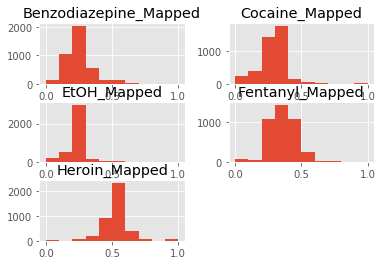

In [26]:
dfCity.hist()

## Trying to Join two data sets

In [27]:
AHBT = 'Affordable_Housing_by_Town_2011-Present.csv'
data = pd.read_csv(AHBT)
data['Town'] = [row.upper() for row in data['Town']]
# data.set_index('Town', inplace=True)
del data['Code']

data.head()

Town  Year  2010 Census Units  Gov Assisted  \
0      ANDOVER  2016               1317            18   
1      ANSONIA  2016               8148           347   
2      ASHFORD  2016               1903            32   
3         AVON  2016               7389           244   
4  BARKHAMSTED  2016               1589             0   

   Tenant Rental Assistance   Single Family CHFA/ USDA Mortgages  \
0                         0                                   22   
1                       658                                  104   
2                         2                                   33   
3                         8                                   31   
4                         7                                   13   

   Deed Restricted Units  Total Assisted Units Percent Affordable  
0                      0                  40.0              3.04%  
1                      9                1118.0             13.72%  
2                      0                  67.0              3.52%  
3                      0                 283.0              3.83%  
4                      0                  20.0              1.26%

In [28]:
# townYear = data.groupby(['Town','Year']).agg({'Total Assisted Units':'mean'})
townMeanYears = data.groupby(['Town']).agg({'Total Assisted Units':'mean'})

In [29]:
townMeanYears

Total Assisted Units
Town                               
ANDOVER                   49.666667
ANSONIA                 1171.833333
ASHFORD                   75.166667
AVON                     276.666667
BARKHAMSTED               16.666667
BEACON FALLS              35.000000
BERLIN                   664.666667
BETHANY                    4.333333
BETHEL                   376.000000
BETHLEHEM                 25.666667
BLOOMFIELD              1022.166667
BOLTON                    18.877143
BOZRAH                    29.666667
BRANFORD                 465.500000
BRIDGEPORT             10715.000000
BRIDGEWATER                2.666667
BRISTOL                 3640.000000
BROOKFIELD               177.833333
BROOKLYN                 348.166667
BURLINGTON                63.000000
CANAAN                    45.833333
CANTERBURY               134.000000
CANTON                   319.500000
CHAPLIN                   29.500000
CHESHIRE                 356.833333
CHESTER                   37.500000
CLINTON                  136.166667
COLCHESTER               513.333333
COLEBROOK                  8.833333
COLUMBIA                  85.333333
...                             ...
THOMASTON                208.666667
THOMPSON                 269.000000
TOLLAND                  185.000000
TORRINGTON              2018.166667
TRUMBULL                 643.166667
UNION                      9.500000
VERNON                  2244.333333
VOLUNTOWN                 51.000000
WALLINGFORD              924.500000
WARREN                     4.166667
WASHINGTON                43.333333
WATERBURY              10753.500000
WATERFORD                368.833333
WATERTOWN                374.500000
WEST HARTFORD           2040.833333
WEST HAVEN              2928.666667
WESTBROOK                187.833333
WESTON                     1.666667
WESTPORT                 301.000000
WETHERSFIELD             972.166667
WILLINGTON               203.166667
WILTON                   235.000000
WINCHESTER               746.666667
WINDHAM                 2795.166667
WINDSOR                  825.166667
WINDSOR LOCKS            481.666667
WOLCOTT                  446.833333
WOODBRIDGE                40.333333
WOODBURY                  85.500000
WOODSTOCK                 88.333333

[169 rows x 1 columns]

In [30]:
# FDrugD(206) townMeanYears(169)

In [31]:
#merging: ignoring the whole notion of index - pd.merger(df1,df2, on = 'HPI')--- 
# used when merging multiple table from same database or set..

## Merging three datasets

In [32]:
#using merge:  

#outer: all the key are represented here and filled empty spots with NaN
#inner: default where all the key match;
joined = pd.merge(df3,pd.merge(FDrugD,townMeanYears, 
                               left_index=True, right_index=True, how= 'inner'),left_index= True,right_index=True);
joined_Cocain = pd.merge(df3,pd.merge(CDrugD,townMeanYears, 
                               left_index=True, right_index=True, how= 'inner'),left_index= True,right_index=True);

In [33]:
joined.keys()

Index(['Admissions', 'Fentanyl_Mapped', 'Total Assisted Units'], dtype='object')

In [34]:
#https://towardsdatascience.com/clustering-why-to-use-it-16d8e2fbafe

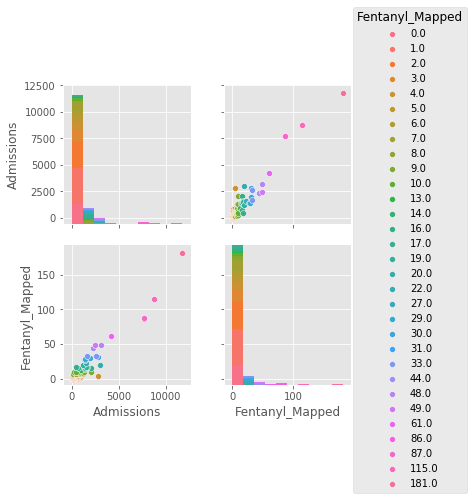

In [35]:
joined.Fentanyl_Mapped.nunique()
cols = joined.columns[:-1]
sns.pairplot(joined, x_vars=cols, y_vars= cols, hue='Fentanyl_Mapped')

In [36]:
X = joined.drop("Fentanyl_Mapped", axis = 1)

In [37]:
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
X_scaled = preprocessing.normalize(X,axis=0)

In [38]:
from sklearn.cluster import KMeans

k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
# inertia = kmeans.inertia_
# print ('Silhouette Score:', metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

In [40]:
pd.DataFrame(X_scaled).corr()

0        1
0  1.00000  0.94013
1  0.94013  1.00000

In [41]:
joined.corr()

Admissions  Fentanyl_Mapped  Total Assisted Units
Admissions              1.000000         0.961972              0.940130
Fentanyl_Mapped         0.961972         1.000000              0.932648
Total Assisted Units    0.940130         0.932648              1.000000

In [42]:
# dfCity

In [43]:
# dfCity.key()

### Assisted Units and Admissions as a predictor of fentanyl deaths?
<ul>
<li>x - predictor variable </li>
<li>ŷ - response variable (the value we are trying to predict)</li>
</ul>


In [44]:

# joined.plot(kind='scatter',x='Total Assisted Units', y = 'Fentanyl_Mapped',
#             figsize=(15,10),title ="Fentanyl Deaths versus Total Assisted Units per Town",
#             xlim=(0,6000),ylim = (0,60)).set(ylabel='Fentanyl Deaths')
# df.plot(kind='scatter', x='chol', y='weight', title="Cholesterol vs. Weight")

In [45]:
joined.isnull().sum()

Admissions              0
Fentanyl_Mapped         0
Total Assisted Units    0
dtype: int64

In [46]:
# joined.plot(kind='scatter',x='Admissions', y = 'Fentanyl_Mapped',
#             figsize=(15,10),title ="Fentanyl Deaths versus Total Assisted Units per Town",
#             xlim=(0,900),ylim = (0,50)).set(ylabel='Fentanyl Deaths')

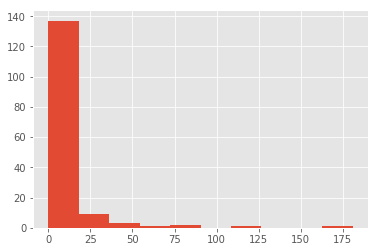

In [47]:
joined["Fentanyl_Mapped"].hist()

In [48]:
# min_max_scaler = prep.MinMaxScaler()

# x_scaled = min_max_scaler.fit_transform(joined[["Fentanyl_Mapped"]])
# # joined["Fentanyl_Mapped_Scaled"] = pd.DataFrame(x_scaled)
# # joined['Fentanyl_Mapped_Scaled'].hist()

In [49]:
joined.describe()

Admissions  Fentanyl_Mapped  Total Assisted Units
count    154.000000       154.000000            154.000000
mean     777.422078         9.025974           1070.577341
std     1549.461689        21.299590           2567.031303
min        0.000000         0.000000              1.666667
25%      123.250000         1.000000             61.125000
50%      287.000000         2.000000            272.833333
75%      709.500000         7.000000            748.291667
max    11740.000000       181.000000          19598.000000

In [50]:
normalize = joined[['Admissions', 'Fentanyl_Mapped', 'Total Assisted Units']]

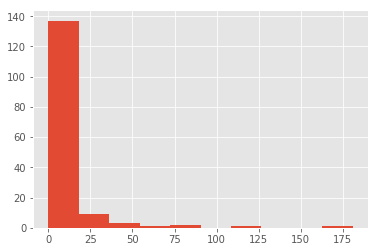

In [51]:
normalize['Fentanyl_Mapped'].hist()

In [52]:
# from sklearn.preprocessing import Normalizer
# norm = Normalizer()
# normalize['Fentanyl_Mapped_Normalized'] = norm.fit_transform(normalize[['Fentanyl_Mapped']])
# normalize['Fentanyl_Mapped_Normalized'].hist()

In [53]:

scaled_data = prep.scale(normalize)
#sklearn convert everything to numpy arrays:
scaled_Fentanyl_df = pd.DataFrame(scaled_data, index = normalize.index, columns = normalize.columns)

scaled_Fentanyl_df.describe()
# note the std is one across the board:

Admissions  Fentanyl_Mapped  Total Assisted Units
count  1.540000e+02     1.540000e+02          1.540000e+02
mean  -1.405802e-17    -8.651089e-18         -1.730218e-17
std    1.003263e+00     1.003263e+00          1.003263e+00
min   -5.033739e-01    -4.251454e-01         -4.177581e-01
25%   -4.235706e-01    -3.780430e-01         -3.945203e-01
50%   -3.175439e-01    -3.309405e-01         -3.117791e-01
75%   -4.397894e-02    -9.542832e-02         -1.259576e-01
max    7.098172e+00     8.100396e+00          7.240999e+00

In [54]:
scaled_Fentanyl_df.head()

Admissions  Fentanyl_Mapped  Total Assisted Units
Town                                                          
ANDOVER       -0.472294        -0.378043             -0.398998
ANSONIA       -0.013871        -0.236736              0.039573
ASHFORD       -0.421790        -0.283838             -0.389032
AVON          -0.454165        -0.283838             -0.310281
BARKHAMSTED   -0.430207        -0.425145             -0.411896

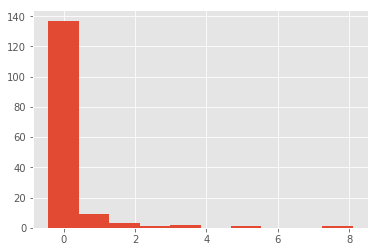

In [55]:
scaled_Fentanyl_df['Fentanyl_Mapped'].hist()

In [56]:
X = scaled_Fentanyl_df[['Admissions', 'Total Assisted Units']]
y = scaled_Fentanyl_df[['Fentanyl_Mapped']]

In [57]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[-0.28097285 -0.28433782]
 [ 5.31740923  5.17825182]
 [ 0.94704427  1.00611307]]


/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


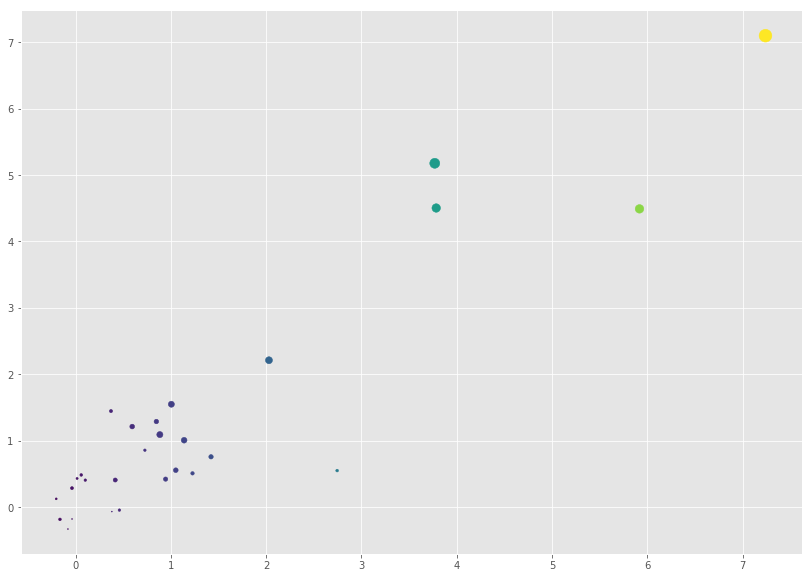

In [58]:
fig = plt.figure(figsize=(14,10))
# ax = Axes3D(fig)
plt.scatter(X['Total Assisted Units'], X['Admissions'],c=X['Total Assisted Units']*10,s=y['Fentanyl_Mapped']*20)


/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


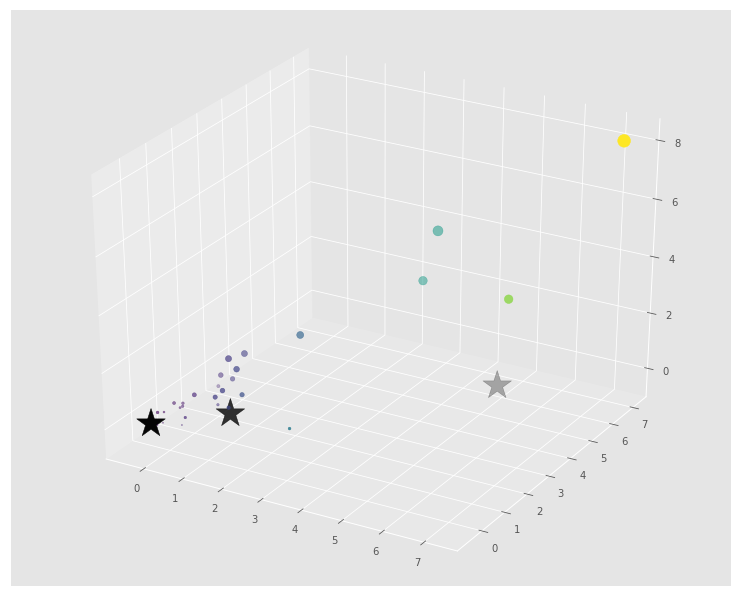

In [59]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(X['Total Assisted Units'], X['Admissions'], y['Fentanyl_Mapped'], c=X['Total Assisted Units']*10,s=y['Fentanyl_Mapped']*20)
ax.scatter(C[:, 0], C[:, 1], marker='*', c='#050505', s=900)

In [60]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
      dtype=int32)

### Merging the labels to the data frame

In [61]:
scaled_Fentanyl_df['Fentanyl_Cluster'] = pd.Series(labels, index=scaled_Fentanyl_df.index)

In [62]:
scaled_Fentanyl_df.head()

Admissions  Fentanyl_Mapped  Total Assisted Units  \
Town                                                             
ANDOVER       -0.472294        -0.378043             -0.398998   
ANSONIA       -0.013871        -0.236736              0.039573   
ASHFORD       -0.421790        -0.283838             -0.389032   
AVON          -0.454165        -0.283838             -0.310281   
BARKHAMSTED   -0.430207        -0.425145             -0.411896   

             Fentanyl_Cluster  
Town                           
ANDOVER                     0  
ANSONIA                     0  
ASHFORD                     0  
AVON                        0  
BARKHAMSTED                 0

### writing data to excel files to represent in our report

In [63]:
cluster_0 = scaled_Fentanyl_df[scaled_Fentanyl_df['Fentanyl_Cluster'] == 0]
cluster_1 = scaled_Fentanyl_df[scaled_Fentanyl_df['Fentanyl_Cluster'] == 1]
cluster_2 = scaled_Fentanyl_df[scaled_Fentanyl_df['Fentanyl_Cluster'] == 2]
cluster_0.to_excel('Fentany_C0.xlsx')
cluster_1.to_excel('Fentany_C1.xlsx')
cluster_2.to_excel('Fentany_C2.xlsx')

In [64]:
cluster_0.shape

(133, 4)

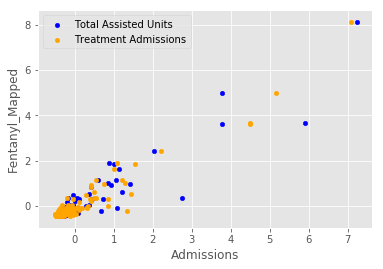

In [65]:
#plt.plot(kind="scatter", x = X, y = y)


ax = scaled_Fentanyl_df.plot.scatter(x='Total Assisted Units', y = 'Fentanyl_Mapped', color='blue', label = 'Total Assisted Units')
scaled_Fentanyl_df.plot.scatter(x='Admissions', y = 'Fentanyl_Mapped', color='orange', ax = ax, label='Treatment Admissions')


### Split Data - Training data - train_test_split

In [66]:
#http://www.portal.ct.gov/DPH/Health-Information-Systems--Reporting/Hisrhome/Hospitalization-Statistics
X = scaled_Fentanyl_df[['Total Assisted Units']]
y = scaled_Fentanyl_df[['Fentanyl_Mapped']]

In [67]:
# Split Data
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # test size 20%, random = True

### Training Model <br>
fit - learning a model<br>
X_train, Y_train = 80% of data

In [68]:
# Train Model
# Now we train our LinearRegression model using the training subset of data.

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

model: <br> <t>y = a + b 


In [69]:
# Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, 
# which is an array of tuples of coefficients.
# Each regression coefficient shows the strength of the relationship between the predictor variable and the
# outcome variable while controlling for the other predictor variable 

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Total Assisted Units is 0.9355127236066288


y = a + 0.0233x

In [70]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.0027537000791843513


Now that we know the regression coefficient for our predictor variable and the intercept, we can figure out our model:

ŷ = 0.349 + 0.0233x


y = 0.349 + 0.0233(65)<br>
Predicted= xx<br>
Acutal =  xx



## How good is our model - the $R^{2}$ statistic

A common method of measuring the accuracy of regression models is to use the $R^{2}$ statistic.

The $R^{2}$ statistic is defined as follows:

$R^{2}$ =  1 – (RSS/TSS)

* The RSS (Residual sum of squares) measures the variability left unexplained after performing the regression
* The TSS measues the total variance in Y
* Therefore the $R^{2}$ statistic measures proportion of variability in Y that is explained by X using our model

The scale of $R^{2}$ statistic ranges from zero to one, with zero indicating that the proposed model **does not improve prediction over the mean model and one indicating perfect prediction**. Improvement in the regression model results in proportional increases in R-squared.

In [71]:
# R^2  can be determined using our test set and the model’s score method.

regression_model.score(X_test, y_test)

# This means that in our model, 95.7% of the variability in Y can be explained using X

0.6438607201883764

In [72]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.08911780966910672

In [73]:
import math

math.sqrt(regression_model_mse)

0.29852606195959963

In [74]:
new_data = [[187]]

regression_model.predict(new_data)

array([[174.93812561]])

only predict numerical values (ordinal or ratio data)

# SVR
<ul>
<li><em>class sklearn.svm.  </em><b>SVR</b><em>(kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)</em></li>
</ul>

In [75]:
X = scaled_Fentanyl_df[['Total Assisted Units']]#'Total Assisted Units', 'Admissions'
y = scaled_Fentanyl_df[['Fentanyl_Mapped']]

In [76]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [77]:
from sklearn import svm

# instantiate model
model = svm.SVR() 

# fit model
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


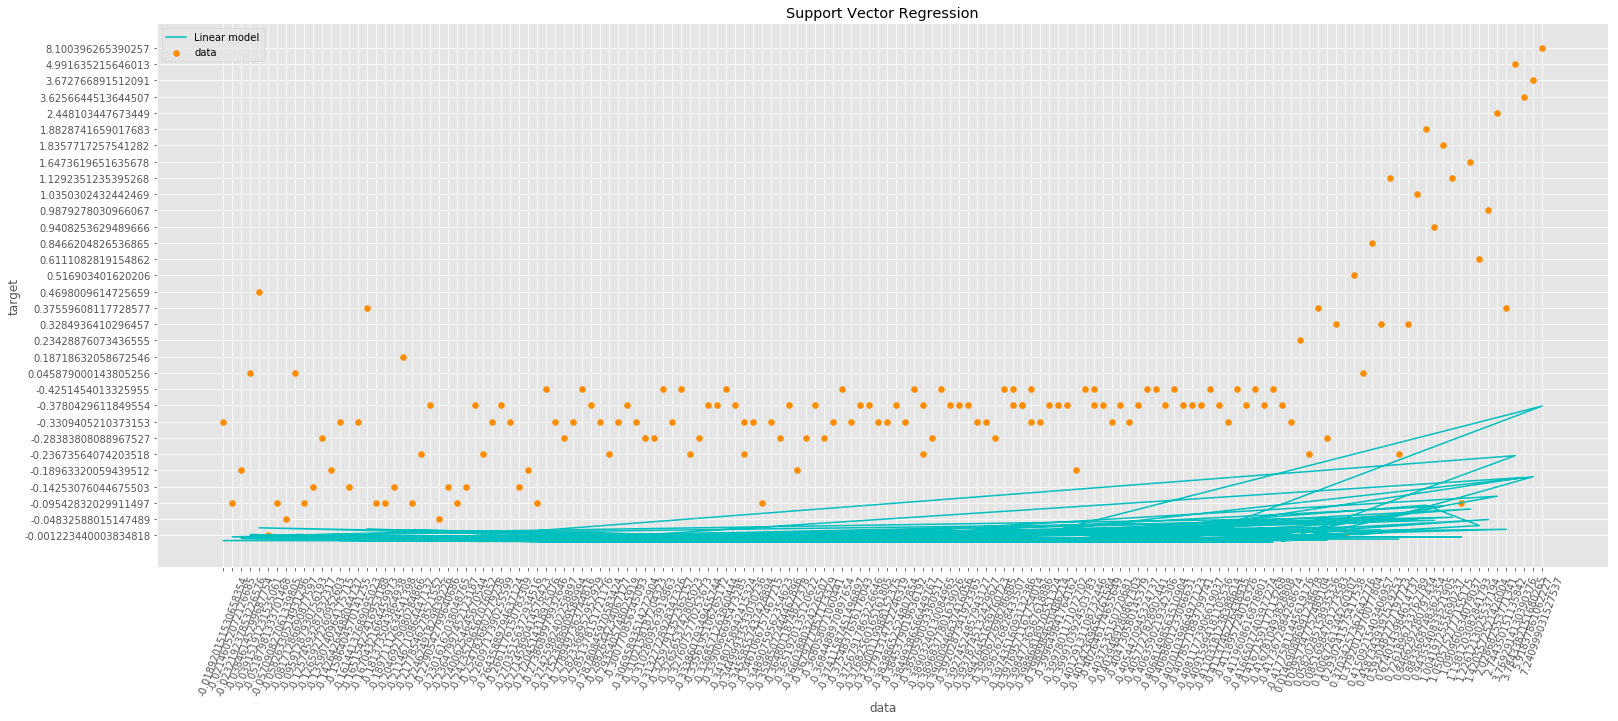

In [78]:
#http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

from sklearn.svm import SVR
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(y)
y_lin = svr_lin.fit(X, y).predict(y)
y_poly = svr_poly.fit(X, y).predict(y)

# #############################################################################
# Look at the results

plt.figure(figsize=(26,10))
plt.xticks(rotation=70)
plt.scatter(X, y, color='darkorange', label='data')
# plt.scatter(X, y_rbf, color='navy', label='RBF model')
plt.plot(X, y_lin, color='c',  label='Linear model')
# plt.scatter(X, y_poly, color='cornflowerblue', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Score() 
<ul>
<li>Returns the coefficient of determination R^2 of the prediction.</li>
<li>http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html</li></ul>

In [79]:
svr_poly.score(X,y)

0.7088356984738724

In [80]:
svr_lin.score(X,y)

0.8672939412132482

In [81]:
svr_poly.score(X,y)

0.7088356984738724

In [82]:
joined.keys()

Index(['Admissions', 'Fentanyl_Mapped', 'Total Assisted Units'], dtype='object')